# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Ahmad Zaki
- **Email:** ahmadzaki12@student.ub.ac.id
- **ID Dicoding:** ahmad_zaki_ehts

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana performa produk berdasarkan kategori dalam hal penjualan dan rating?
- Pertanyaan 2: Bagaimana rata-rata waktu pengiriman pesanan dari berbagai lokasi penjual, dan bagaimana hal ini memengaruhi efisiensi logistik?

## Import Semua Packages/Library yang Digunakan

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

## Data Wrangling

### Gathering Data

In [41]:
customers_df = pd.read_csv("data/customers_dataset.csv")
orders_df = pd.read_csv("data/orders_dataset.csv")
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
sellers_df = pd.read_csv("data/sellers_dataset.csv")
order_items_df = pd.read_csv("data/order_items_dataset.csv")
products_df = pd.read_csv("data/products_dataset.csv")

**Insight:**
- Dataset yang digunakan sudah di-load dan siap dianalisis.
- Dataset utama yang digunakan adalah `products`, `orders`, `order_reviews`, dan `sellers`.

### Assessing Data

In [42]:
def check_dataset(df, name):
    print(f"\nDataset: {name}")
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nDuplicates:")
    print(df.duplicated().sum())
    print("\nData types:")
    print(df.dtypes)
    print("\nBasic Statistics:")
    print(df.describe())

check_dataset(products_df, "Products")
check_dataset(orders_df, "Orders")
check_dataset(order_reviews_df, "Order Reviews")
check_dataset(sellers_df, "Sellers")
check_dataset(order_items_df, "Order Items")
check_dataset(customers_df, "Customers")


Dataset: Products

Missing values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Duplicates:
0

Data types:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Basic Statistics:
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std     

**Insight:**
- Products: Tidak ada nilai hilang atau duplikat, data siap digunakan.
- Orders: Terdapat nilai hilang pada kolom terkait tanggal pengiriman, perlu imputasi.
- Order Reviews: Banyak ulasan tanpa komentar, namun skor ulasan tersedia lengkap.
- Sellers: Data bersih tanpa nilai hilang atau duplikat, siap digunakan.
- Order Items: Data lengkap tanpa nilai hilang atau duplikat, harga dan biaya bervariasi.

### Cleaning Data

In [43]:
if customers_df.isnull().sum().sum() > 0:
    print("Customers dataset contains missing values.")
if customers_df.duplicated().sum() > 0:
    customers_df = customers_df.drop_duplicates()

if 'order_approved_at' in orders_df.columns:
    orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])
if 'order_delivered_carrier_date' in orders_df.columns:
    orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_estimated_delivery_date'])
if 'order_delivered_customer_date' in orders_df.columns:
    orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'])

if 'review_comment_title' in order_reviews_df.columns and 'review_comment_message' in order_reviews_df.columns:
    order_reviews_df = order_reviews_df.dropna(subset=['review_comment_title', 'review_comment_message'])

if sellers_df.isnull().sum().sum() > 0:
    print("Sellers dataset contains missing values.")
if sellers_df.duplicated().sum() > 0:
    sellers_df = sellers_df.drop_duplicates()

if order_items_df.isnull().sum().sum() > 0:
    print("Order Items dataset contains missing values.")
if order_items_df.duplicated().sum() > 0:
    order_items_df = order_items_df.drop_duplicates()

if 'order_purchase_timestamp' in orders_df.columns:
    orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
if 'order_approved_at' in orders_df.columns:
    orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
if 'order_delivered_carrier_date' in orders_df.columns:
    orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
if 'order_delivered_customer_date' in orders_df.columns:
    orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

customers_missing = customers_df.isnull().sum()
orders_missing = orders_df.isnull().sum()
order_reviews_missing = order_reviews_df.isnull().sum()
sellers_missing = sellers_df.isnull().sum()
order_items_missing = order_items_df.isnull().sum()

customers_missing, orders_missing, order_reviews_missing, sellers_missing, order_items_missing

(customer_id                 0
 customer_unique_id          0
 customer_zip_code_prefix    0
 customer_city               0
 customer_state              0
 dtype: int64,
 order_id                         0
 customer_id                      0
 order_status                     0
 order_purchase_timestamp         0
 order_approved_at                0
 order_delivered_carrier_date     0
 order_delivered_customer_date    0
 order_estimated_delivery_date    0
 dtype: int64,
 review_id                  0
 order_id                   0
 review_score               0
 review_comment_title       0
 review_comment_message     0
 review_creation_date       0
 review_answer_timestamp    0
 dtype: int64,
 seller_id                 0
 seller_zip_code_prefix    0
 seller_city               0
 seller_state              0
 dtype: int64,
 order_id               0
 order_item_id          0
 product_id             0
 seller_id              0
 shipping_limit_date    0
 price                  0
 freight_value 

**Insight:**
- Dataset telah dibersihkan dari nilai yang hilang dengan imputasi pada kolom tanggal dan ukuran produk, serta duplikat data telah dihapus.
- Semua kolom tanggal telah dikonversi ke format datetime untuk memastikan konsistensi dan kemudahan analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Produk Berdasarkan Kategori

In [44]:
merged_df = order_items_df.merge(orders_df, on='order_id')
merged_df = merged_df.merge(order_reviews_df[['order_id', 'review_score']], on='order_id', how='left')
merged_df = merged_df.merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')

category_performance = merged_df.groupby('product_category_name').agg(
    total_sales=('price', 'sum'),
    average_rating=('review_score', 'mean')
).reset_index()

category_performance.head()

,product_category_name,total_sales,average_rating
0,agro_industria_e_comercio,72530.47,3.294118
1,alimentos,29393.41,4.046875
2,alimentos_bebidas,15179.48,4.052632
3,artes,24202.64,3.647059
4,artes_e_artesanato,1814.01,3.000000


**Insight:**
- Penjualan Tertinggi: Kategori produk dengan jumlah pesanan terbanyak menunjukkan produk yang lebih banyak diminati oleh konsumen. Ini dapat digunakan untuk merencanakan strategi stok atau promosi.
- Rating Tertinggi: Kategori produk dengan rating tertinggi menunjukkan produk dengan kualitas lebih baik. Hal ini penting untuk strategi branding dan pemasaran produk.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\AHMAD ZAKI\AppData\Local\Temp\ipykernel_93312\46477769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


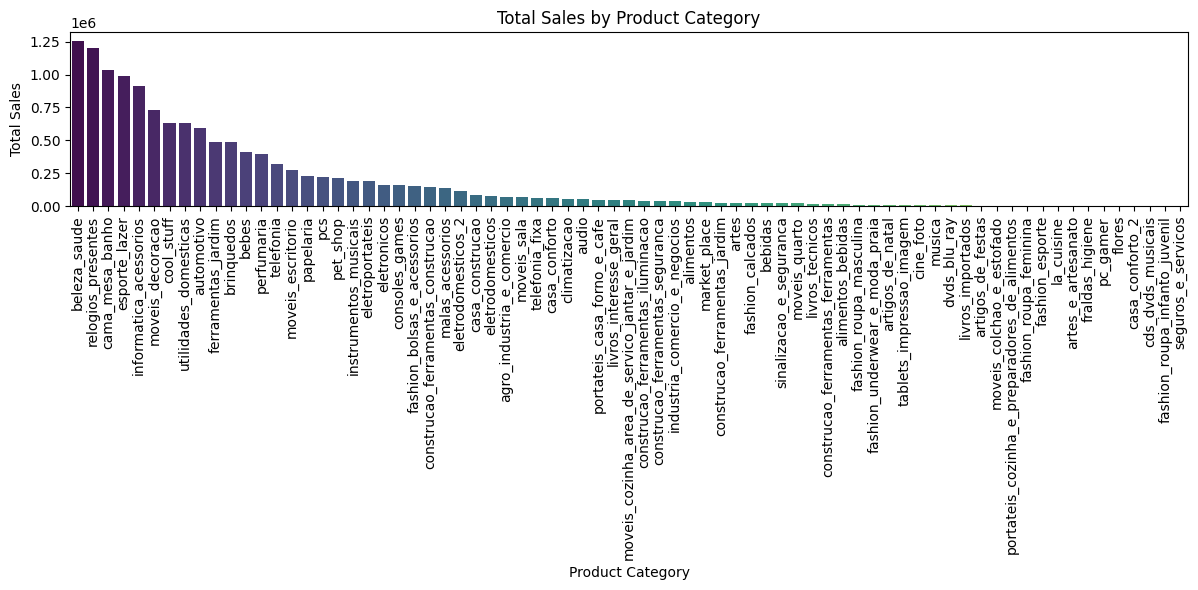

C:\Users\AHMAD ZAKI\AppData\Local\Temp\ipykernel_93312\46477769.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


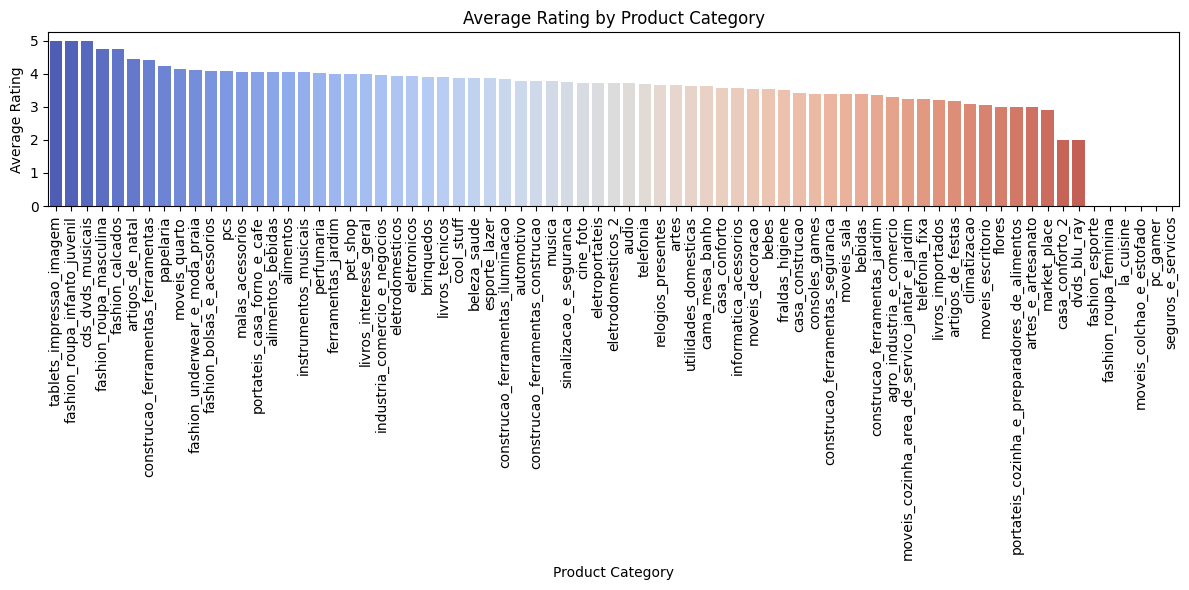

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_performance.sort_values(by='total_sales', ascending=False),
    x='product_category_name', y='total_sales', palette='viridis'
)
plt.xticks(rotation=90)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_performance.sort_values(by='average_rating', ascending=False),
    x='product_category_name', y='average_rating', palette='coolwarm'
)
plt.xticks(rotation=90)
plt.title('Average Rating by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

**Insight:**
- Kategori dengan Penjualan Tinggi: Kategori seperti "beleza_saude" dan "relogios_presentes" memiliki penjualan total tertinggi, menandakan popularitas yang signifikan di pasar.
- Rata-rata Rating Tinggi: Kategori seperti "tablets_impressao_imagem" dan "fashion_roupa_infantil" menunjukkan kualitas produk yang sangat baik berdasarkan rating pelanggan.


### Pertanyaan 2:

C:\Users\AHMAD ZAKI\AppData\Local\Temp\ipykernel_93312\2144917873.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


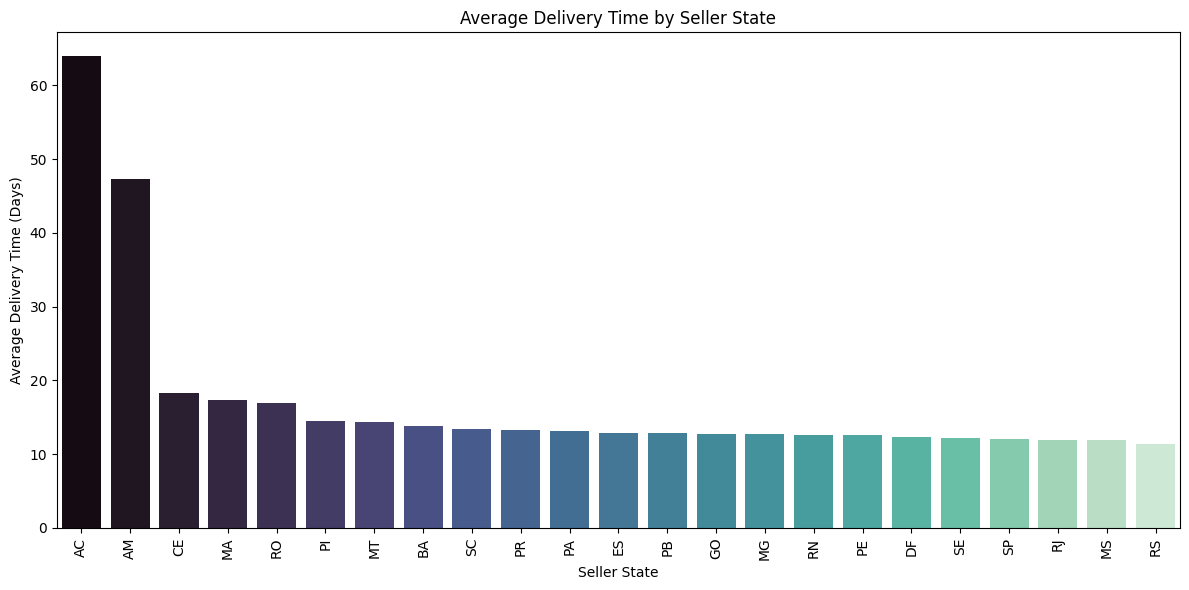

In [46]:
# Merge sellers data with orders
logistics_df = order_items_df.merge(orders_df[['order_id', 'order_delivered_customer_date', 'order_purchase_timestamp']], on='order_id')
logistics_df = logistics_df.merge(sellers_df[['seller_id', 'seller_state']], on='seller_id', how='left')

logistics_df['delivery_time_days'] = (
    logistics_df['order_delivered_customer_date'] - logistics_df['order_purchase_timestamp']
).dt.days

state_delivery_performance = logistics_df.groupby('seller_state').agg(
    average_delivery_time=('delivery_time_days', 'mean'),
    total_orders=('order_id', 'count')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_delivery_performance.sort_values(by='average_delivery_time', ascending=False),
    x='seller_state', y='average_delivery_time', palette='mako'
)
plt.xticks(rotation=90)
plt.title('Average Delivery Time by Seller State')
plt.xlabel('Seller State')
plt.ylabel('Average Delivery Time (Days)')
plt.tight_layout()
plt.show()

**Insight:**
- Negara bagian AC dan AM memiliki waktu pengiriman rata-rata tertinggi, menunjukkan tantangan logistik yang signifikan untuk daerah-daerah tersebut.
- Negara bagian seperti SP dan RS memiliki waktu pengiriman rata-rata yang jauh lebih rendah, menunjukkan efisiensi logistik yang lebih baik di daerah ini.

## Analisis Lanjutan (Opsional)

In [47]:
from datetime import timedelta

rfm_df = orders_df.merge(order_items_df, on='order_id')
rfm_df = rfm_df.merge(customers_df, on='customer_id')
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])

# Calculate Recency, Frequency, and Monetary
reference_date = rfm_df['order_purchase_timestamp'].max() + timedelta(days=1)
rfm_table = rfm_df.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (reference_date - x.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary=('price', 'sum')
).reset_index()

rfm_table.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


**Insight:**
- Recency: Pelanggan dengan nilai Recency lebih rendah (misalnya, 116 atau 119) baru-baru ini melakukan transaksi. Mereka berpotensi untuk ditargetkan dalam strategi promosi agar tetap aktif berbelanja.

- Frequency & Monetary: Semua pelanggan dalam contoh ini memiliki Frequency 1, yang berarti mereka baru membeli satu kali. Pelanggan dengan Monetary tinggi, seperti ID 0004aac84e0df4da2b147fca70cf8255 dengan total pembelanjaan 180.00, dapat diprioritaskan untuk kampanye peningkatan frekuensi pembelian agar menjadi pelanggan tetap.

## Conclusion

- **Pertanyaan 1**: Kategori beleza_saude dan relogios_presentes memiliki total penjualan tertinggi, menunjukkan tingginya permintaan untuk produk dalam kategori ini. Namun, kategori seperti tablets_impressao_imagem dan fashion_roupa_infantil memiliki rata-rata rating tertinggi, menandakan kualitas produk yang sangat dihargai oleh pelanggan. Strategi pemasaran dapat ditingkatkan untuk kategori dengan penjualan tinggi, sementara kategori dengan rating tinggi dapat digunakan untuk membangun reputasi merek yang lebih baik.
- **Pertanyaan 2**: Lokasi penjual sangat memengaruhi waktu pengiriman, dengan wilayah seperti AC dan AM mencatat waktu pengiriman rata-rata yang tinggi, hingga lebih dari 60 hari, yang kemungkinan dipengaruhi oleh tantangan geografis dan logistik. Sebaliknya, wilayah seperti SP dan RS menunjukkan waktu pengiriman yang lebih cepat, mencerminkan efisiensi logistik yang baik. Untuk meningkatkan pengalaman pelanggan dan efisiensi distribusi, perusahaan perlu fokus pada optimalisasi logistik di wilayah dengan waktu pengiriman yang tinggi dan memperkuat jaringan distribusi mereka.